In [1]:
import numpy as np
import pandas as pd
from solvers.qcd import QCD
from multiprocessing import Pool, TimeoutError
from datetime import datetime
from scipy.fftpack import fft, ifft, fftfreq
from scipy.special import expit

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 8
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"

# import seaborn as sns
# sns.set()

# plt.rcParams['figure.figsize'] = 14, 8
# plt.rcParams['axes.labelsize'] = 18
# plt.rcParams['axes.titlesize'] = 22
# plt.rcParams['font.size'] = 20
# plt.rcParams['lines.linewidth'] = 1.5
# plt.rcParams['lines.markersize'] = 8
# plt.rcParams['legend.fontsize'] = 20

In [4]:
device = QCD(N=1024)

In [5]:
# device.turn_bias_on(bias=5, core_only=True)
#device.turn_bias_off()

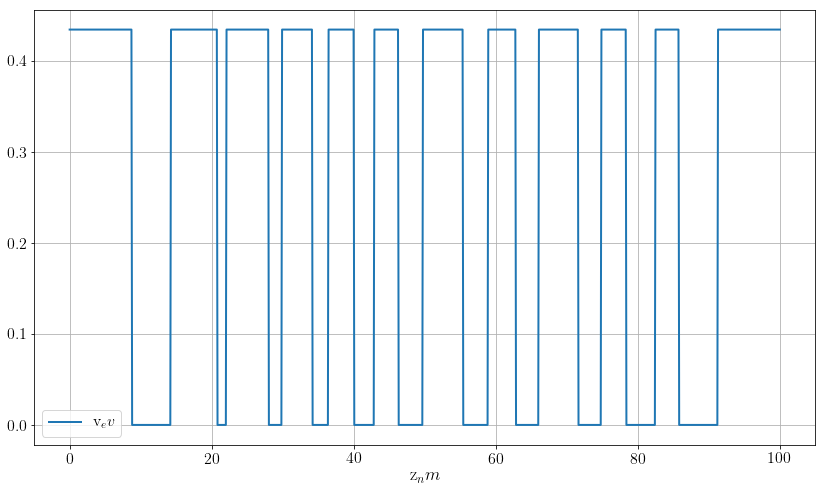

In [7]:
device.device.plot('z_nm', 'v_ev', grid=True, figsize=(14,8))

In [8]:
#info = device.turn_bias_on(bias=5, core_only=True).solve_eigen_problem(verbose=True).get_system_states()
info = device.solve_eigen_problem(verbose=True).get_system_states()
eigenvalues = np.array(info[1])
info[1]

Using values from stored file


[0.09051374957070998,
 0.131028575233297,
 0.16005222821973264,
 0.176792818689596,
 0.19685198740306786,
 0.24225920482349447,
 0.2813639436711724,
 0.3273583587707321]

In [9]:
labels = [c for c in info[0].columns if c != 'z_nm' and c != 'v_ev' and c != 'm_eff']
labels

['state_0',
 'state_1',
 'state_2',
 'state_3',
 'state_4',
 'state_5',
 'state_6',
 'state_7']

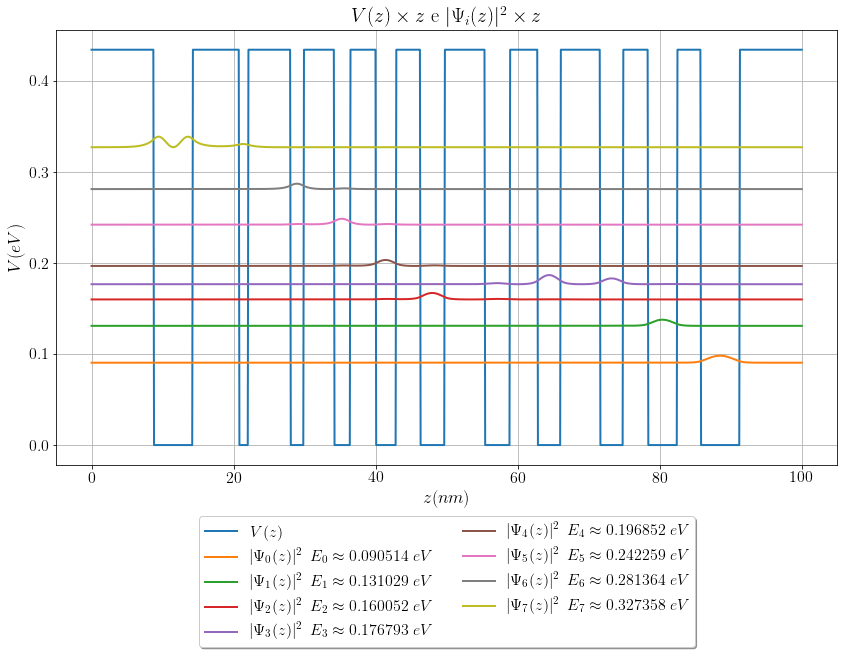

In [10]:
# info[0].plot(x='z_nm', y=states, grid=True, figsize=(14,8))
# plt.show()
info = device.get_system_states()
z_nm, V = info[0].z_nm, info[0].v_ev

fig, ax = plt.subplots()
ax.set_xlabel(r'$z (nm)$')
ax.set_ylabel(r'$V (eV)$')
ax.plot(z_nm, V, label=r'$V(z)$')

states = np.array([info[0][l] for l in labels], dtype=np.complex_)
for i, state in enumerate(states):
    state *= np.ptp(V) / np.ptp(np.abs(state)**2)/10
    _eivenvalue = eigenvalues[i]
    psi = (np.abs(state)**2).real + _eivenvalue
    ax.plot(z_nm, psi, label=r'$|\Psi_%d(z)|^2 \,\,\, E_%d \approx %.6f \,\, eV$' % (i, i, _eivenvalue))

ax.set_title(r"$V(z) \times z$ e $|\Psi_i(z)|^2 \times z$")
ax.grid(True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  shadow=True, ncol=2)
plt.show()
#plt.savefig('double_barrier_quantum_well_degani.png', bbox_inches='tight')

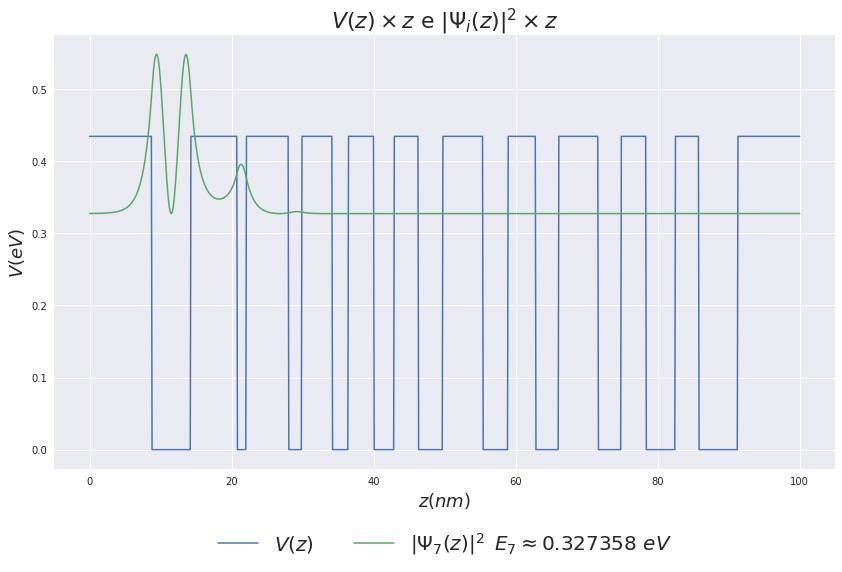

In [14]:
device.evolve_state_in_time(T=1e-12, state=7)

fig, ax = plt.subplots()
ax.set_xlabel(r'$z (nm)$')
ax.set_ylabel(r'$V (eV)$')
ax.plot(z_nm, V, label=r'$V(z)$')

i = 7
state = np.array(device.device.state_7_evolved, dtype=np.complex_)
state *= np.ptp(V) / np.ptp(np.abs(state)**2)/10
_eivenvalue = eigenvalues[i]
psi = (np.abs(state)**2).real + _eivenvalue
ax.plot(z_nm, psi, label=r'$|\Psi_%d(z)|^2 \,\,\, E_%d \approx %.6f \,\, eV$' % (i, i, _eivenvalue))

ax.set_title(r"$V(z) \times z$ e $|\Psi_i(z)|^2 \times z$")
ax.grid(True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  shadow=True, ncol=2)
plt.show()